In [8]:
import pandas as pd
import numpy as np 
import sklearn

from sklearn.metrics import mean_squared_error

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils.vis_utils import plot_model
from tensorflow import keras


from tensorflow.keras.layers import Input, Dense, BatchNormalization
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
def NormalizeData(data): #Must use this function to normalize the data before training
    normalized_data = (data - np.min(data,axis=0)) / (np.max(data,axis=0) - np.min(data,axis=0))
    return normalized_data

def Undo_NormalizeData(data_output, data): #Must use this function to get the predicted output
    not_normalized_data = data_output * (np.max(data,axis=0) - np.min(data,axis=0) + np.min(data,axis=0))
    return not_normalized_data

df = pd.read_csv('training_data.csv') #TODO
#df = df.loc[()] #if necessary, conditionally select relevant data
print(df)
print(df.shape)

              x         y         z        vx        vy        vz  gamma_srp  \
0      8.644383  3.414014  6.272693  0.095590  0.084386  0.099086   0.005508   
1      1.041932  4.528473  5.164467  0.027336  0.022092  0.065584   0.000946   
2      2.249184  3.168478  3.653426  0.012158  0.018015  0.038449   0.029851   
3      9.355995  2.231757  8.930586  0.085698  0.083401  0.028777   0.051875   
4      8.874650  0.649924  4.857421  0.086009  0.020477  0.011519   0.033073   
...         ...       ...       ...       ...       ...       ...        ...   
49995  2.306939  7.350681  9.852080  0.016352  0.096401  0.083230   0.008722   
49996  9.965313  3.590980  8.771898  0.009535  0.099012  0.087118   0.043257   
49997  6.625152  7.674617  6.683209  0.008698  0.000204  0.091725   0.060322   
49998  1.519166  5.761292  6.354035  0.071963  0.014639  0.002344   0.017338   
49999  7.454597  2.299643  4.621034  0.049021  0.014605  0.036766   0.028852   

        gamma_D       psi        ref_x 

In [10]:
targets = ['residual_x','residual_y','residual_z','dparam_dt1','dparam_dt2','dparam_dt3'] #TODO outputs 
predictors = ['x','y','z','vx','vy','vz','gamma_srp','gamma_D','psi','ref_x','ref_y','ref_z','ref_vx','ref_vy','ref_vz','t'] #TODO inputs

X_data = df[predictors].values
Y_data = df[targets].values
X_data_normalized = NormalizeData(X_data)
Y_data_normalized = NormalizeData(Y_data)

In [11]:
#construct neural network architecture
keras.backend.clear_session()
model = Sequential()
model.add(Dense(2000, input_dim=len(predictors), activation= "relu"))
model.add(Dense(1000, activation= "relu"))
model.add(Dense(500, activation= "relu"))
model.add(Dense(250, activation= "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(len(targets)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              34000     
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 6)                 606       
                                                                 
Total params: 2,686,456
Trainable params: 2,686,456
Non-

In [ ]:
optimizer_hyper = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(loss = "mean_squared_error", optimizer = optimizer_hyper, metrics=['accuracy'])
test_amount = 0.20 #amount of test data, example: 0.1 = 10% of the (bottom portion of datapoints) datapoints will serve as test set
history = model.fit(X_data_normalized, Y_data_normalized, validation_split=test_amount, epochs=50, batch_size=5,shuffle=True)
print('finished training, ready to predict. If necessary, ready to validate.')

Epoch 1/50
8000/8000 [==============================] - 79s 10ms/step - loss: 0.0304 - accuracy: 0.2981 - val_loss: 0.0275 - val_accuracy: 0.2248
Epoch 2/50
8000/8000 [==============================] - 81s 10ms/step - loss: 0.0269 - accuracy: 0.3112 - val_loss: 0.0264 - val_accuracy: 0.3270
Epoch 3/50
8000/8000 [==============================] - 78s 10ms/step - loss: 0.0267 - accuracy: 0.3211 - val_loss: 0.0260 - val_accuracy: 0.2433
Epoch 4/50
8000/8000 [==============================] - 84s 10ms/step - loss: 0.0265 - accuracy: 0.3187 - val_loss: 0.0265 - val_accuracy: 0.2946
Epoch 5/50
8000/8000 [==============================] - 84s 10ms/step - loss: 0.0265 - accuracy: 0.3110 - val_loss: 0.0279 - val_accuracy: 0.4073
Epoch 6/50
8000/8000 [==============================] - 84s 10ms/step - loss: 0.0264 - accuracy: 0.3147 - val_loss: 0.0264 - val_accuracy: 0.2835
Epoch 7/50
8000/8000 [==============================] - 79s 10ms/step - loss: 0.0264 - accuracy: 0.3290 - val_loss: 0.0262 -

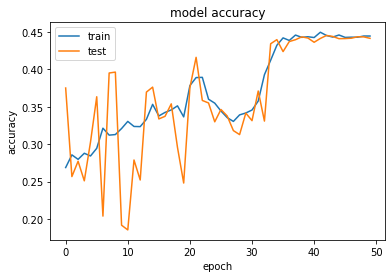

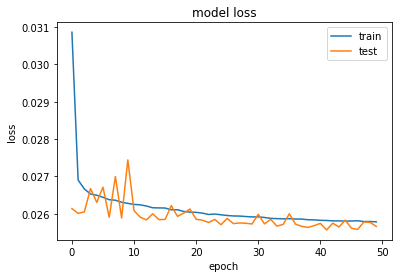

In [7]:
#do validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
mpl.rcParams['figure.dpi'] = 105

In [ ]:
#model.save('NN_model') #this is how to save the trained model to a folder
#model = keras.models.load_model('NN_model') #this is how to load the model folder as a useful object


In [16]:
#example of how to use the NN_model to predict on a given input
#probably nest the 5 lines below into a for loop to perform online predictions
reshaped_X = X_data_normalized[7,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
reshaped_X = X_data_normalized[4987,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
Y_output_normalized = model.predict(reshaped_X)[0]
Y_output_final = Undo_NormalizeData(Y_output_normalized, Y_data[4987])
print(Y_output_final)

[1935.7637 1495.1533]
